In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import datetime
import tensorflow as tf
from sklearn.metrics import mean_squared_error
tf.set_random_seed(20)
np.random.seed(20)

Using TensorFlow backend.


#### Load the dataset

In [2]:
data = pd.read_csv("C://Users//shaya//Desktop//Kaggle datasets//occupancy_data//datatraining.txt",engine='python')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### We separate date and time from Date column and delete it

In [3]:
data['Date']=pd.to_datetime(data['date']).dt.date
data['Time']=pd.to_datetime(data['date']).dt.time
data.drop(columns='date',inplace=True)
data=data.set_index(data['Date'])
data.drop(columns='Date',inplace=True)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time
Date,,,,,,,
2015-02-04,23.18,27.2720,426.0,721.25,0.004793,1,17:51:00
2015-02-04,23.15,27.2675,429.5,714.00,0.004783,1,17:51:59
2015-02-04,23.15,27.2450,426.0,713.50,0.004779,1,17:53:00
2015-02-04,23.15,27.2000,426.0,708.25,0.004772,1,17:54:00
2015-02-04,23.10,27.2000,426.0,704.50,0.004757,1,17:55:00


In [4]:
data.dtypes
print(data.count())

Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
Time             8143
dtype: int64


#### Lets see occupancy w.r.t. time for a single day 02-05-2015. It is seen that the most occupancy is between 7am to 7pm

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

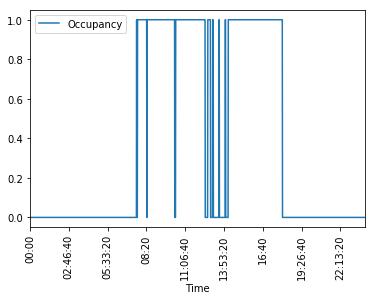

In [5]:
day = data.loc[datetime.date(year=2015,month=2,day=5)]
day.plot('Time','Occupancy')
plt.xticks(rotation=90)

#### Preprocess the Temperature, Humidity, Light, CO2 and Humidity Ratio column

In [6]:
columns_to_scale = ['Temperature','Humidity','Light','CO2','HumidityRatio']
scaler = StandardScaler().fit(data[columns_to_scale].to_numpy())
data.loc[:,columns_to_scale] = scaler.transform(data[columns_to_scale].to_numpy())
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time
Date,,,,,,,
2015-02-04,2.518470,0.278526,1.573763,0.364948,1.091757,1,17:51:00
2015-02-04,2.488967,0.277713,1.591735,0.341881,1.080555,1,17:51:59
2015-02-04,2.488967,0.273645,1.573763,0.340290,1.075888,1,17:53:00
2015-02-04,2.488967,0.265508,1.573763,0.323587,1.066555,1,17:54:00
2015-02-04,2.439796,0.265508,1.573763,0.311655,1.049523,1,17:55:00


In [7]:
training_data = data[['Temperature','Humidity','Light','CO2','HumidityRatio']]
target = data[['Occupancy']]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(training_data,target,test_size=0.2)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer= Adam(lr=0.0001,decay=1e-6),metrics=['accuracy'])
    model.summary()
    return model

In [10]:
model = create_model()
history = model.fit(x_train,y_train,epochs=100,batch_size=64,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 5211 samples, validate on 1303 samples
Epoch 1/100
5211/5211 [==============================] - 2s 459us/step - loss: 0.9404 - acc: 0.1272 - val_loss: 0.9317 - val_acc: 0.1320
Epoch 2/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.8909 - acc: 0.1762 - val_loss: 0.8842 - val_acc: 0.2387
Epoch 3/100
5211/5211 [==============================] - 0s 37us/step - loss: 0.8462 - acc: 0.3552 

Epoch 52/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1494 - acc: 0.9770 - val_loss: 0.1557 - val_acc: 0.9739
Epoch 53/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1446 - acc: 0.9770 - val_loss: 0.1512 - val_acc: 0.9739
Epoch 54/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1401 - acc: 0.9779 - val_loss: 0.1468 - val_acc: 0.9754
Epoch 55/100
5211/5211 [==============================] - 0s 37us/step - loss: 0.1358 - acc: 0.9783 - val_loss: 0.1426 - val_acc: 0.9762
Epoch 56/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1317 - acc: 0.9789 - val_loss: 0.1386 - val_acc: 0.9762
Epoch 57/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1277 - acc: 0.9797 - val_loss: 0.1348 - val_acc: 0.9770
Epoch 58/100
5211/5211 [==============================] - 0s 36us/step - loss: 0.1239 - acc: 0.9802 - val_loss: 0.1312 - val_acc: 0.9770
Epoch 59/100
5211/5211 [=================

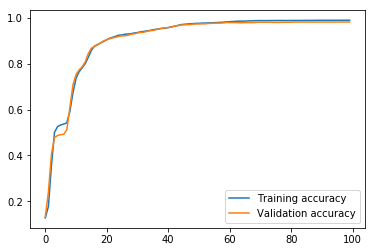

In [11]:
plt.plot(history.history['acc'],label="Training accuracy")
plt.plot(history.history['val_acc'], label = "Validation accuracy")
plt.legend()
plt.show()

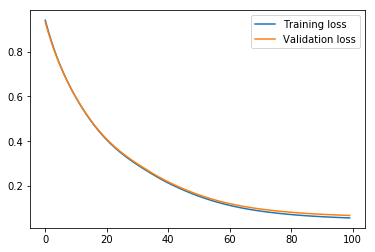

In [12]:
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [13]:
test_data = pd.read_csv("C://Users//shaya//Desktop//Kaggle datasets//occupancy_data//datatest.txt",engine='python')
test_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [14]:
test_data.drop(columns='date',inplace=True)

In [15]:
columns_to_scale = ['Temperature','Humidity','Light','CO2','HumidityRatio']
test_set_scaler = StandardScaler().fit(test_data[columns_to_scale].to_numpy())
test_data.loc[:,columns_to_scale] = test_set_scaler.transform(test_data[columns_to_scale].to_numpy())
test_data_occupancy = pd.DataFrame({"Occupancy":test_data['Occupancy']})
test_data.drop(columns='Occupancy',inplace=True)
test_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
140,2.204762,0.376814,1.566862,0.106940,1.207540
141,2.222275,0.384202,1.539680,0.145214,1.221461
142,2.233950,0.359575,1.516762,0.176881,1.209161
143,2.226653,0.316478,1.201302,0.194253,1.174140
144,2.257300,0.347262,1.180715,0.208776,1.211522


In [16]:
predictions = model.predict_classes(test_data)

In [17]:
compare = pd.DataFrame({"test_data":test_data_occupancy['Occupancy'].values,"predictions":predictions[:,0]})


In [18]:
print("Mean squared error is",mean_squared_error(compare["test_data"],compare['predictions']))

Mean squared error is 0.05590994371482176
